In [1]:
from CNNTextClassifier import *
import datetime
from utils import *
from evaluate import *

In [2]:
from utils import loadData
train_set, val_set, test_set, all_categories = loadData('data/')

In [3]:
emb_size=300
out_size=len(all_categories)
batch_size=50
output_dir="results/{:%Y%m%d_%H%M%S}/".format(datetime.now())
epochs=500
lr=0.005
filter_sizes=[1,2,3,5]
num_filters = 36
dropout_rate=0.1
train = True #ako želimo trenirati postavimo na True, a ako samo želimo evaluirati postojeći model onda na False
if train:
    ft = loadFastText('../../')
    weights_matrix = getWeightsMatrix(char_list,ft)
else:
    weights_matrix = torch.from_numpy(np.zeros((len(char_list)+1, emb_size))).float() #dummy matrix da se ne mora ucitavati fasttext

In [4]:
# definiranje modela
model = CNN_Text(out_size, vocab_len, emb_size, weights_matrix, filter_sizes, num_filters, dropout_rate)
if train:
    model = model.to("cuda")

In [5]:
## ako zelimo trenirati
from train import *
model_weights_path = train(model, train_set, val_set, batch_size, output_dir, epochs, lr)
print('naučene težine modela u spremljene u:', model_weights_path)

train loss 0.308, val loss 0.297, val accuracy 0.909, and val rmse 0.989
train loss 0.061, val loss 0.290, val accuracy 0.940, and val rmse 0.589
train loss 0.056, val loss 0.413, val accuracy 0.946, and val rmse 0.593
train loss 0.045, val loss 0.437, val accuracy 0.948, and val rmse 0.399
train loss 0.038, val loss 0.509, val accuracy 0.948, and val rmse 0.430
train loss 0.052, val loss 0.489, val accuracy 0.948, and val rmse 0.394
train loss 0.030, val loss 0.600, val accuracy 0.941, and val rmse 0.419
train loss 0.041, val loss 0.631, val accuracy 0.945, and val rmse 0.471
train loss 0.036, val loss 0.611, val accuracy 0.946, and val rmse 0.434
train loss 0.032, val loss 0.640, val accuracy 0.941, and val rmse 0.461
naučene težine modela u spremljene u: results/20221010_201452/model.weights


 --------------Evaluation metrics: ----------------------           
 * test loss: 0.196
 * test accuracy: 0.946,
 * test rmse: 0.571,
 * test microF1: 0.843,
 * test macroF1: 0.946,
 * test weightedF1: 0.940


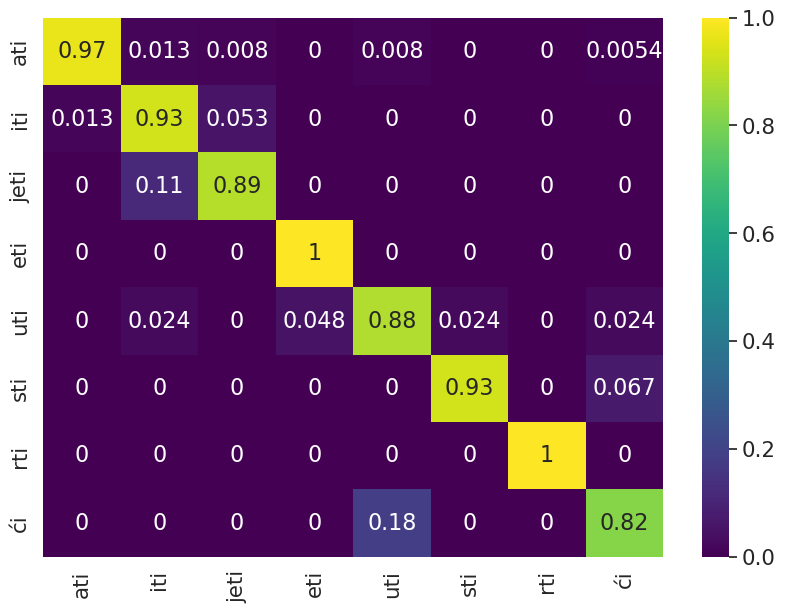

In [8]:
# evaluacija prethodno spremljenog modela
#model_weights_path='../results/20211116_130204/model.weights'
model_weights_path = 'results/hyperparameters/hp2/model.weights'
#model_weights_path = 'results/20211124_114930/model.weights'
model_weights_path = 'results/20211124_223131/model.weights'
#novi datasetovi:
model_weights_path = 'results/20221010_194544/model.weights'
model_weights_path='results/20221010_195200/model.weights' 
model_weights_path='results/20221010_200632/model.weights' #zasad najbolji
#model_weights_path='results/20221010_201452/model.weights'
model = loadModel(model_weights_path)
evaluateOnTestSet(model, test_set,all_categories)

infinitiv završava na: ati


/home/rcoric/klasifikacija/CNNClassification/evaluateModel.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + suffixes)


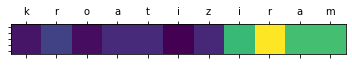

infinitiv završava na: ati


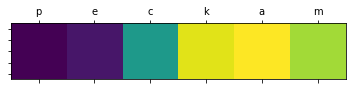

infinitiv završava na: ati


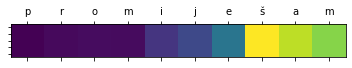

infinitiv završava na: ati


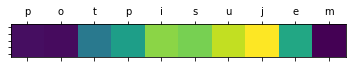

infinitiv završava na: ati


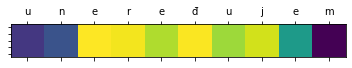

infinitiv završava na: ati


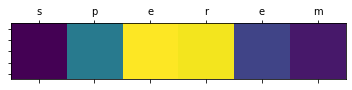

In [6]:
# heatmaps i predikcije za željene glagole
glagoli = ['kroatiziram','peckam','promiješam','potpisujem','uneređujem','sperem']
for verb in glagoli:
    #napravi heatmap
    heatmap(verb,model)